In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from nn import Net

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

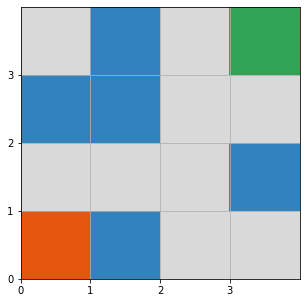

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    full_state=True,
)

In [4]:
target_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

policy_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

dqn = DQN(
    env=deterministic_env,
    env_type='vector',
    log_freq=100,
    train_freq=3,
    batch_size=50,
    w_sync_freq=10,
    memory_size=500,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

dqn.run()

Episode: 0, Reward: -502.9000000000005, Loss: 0
Episode: 100, Reward: -51.80000000000002, Loss: 100.4601058959961
Episode: 200, Reward: 4.75, Loss: 8.328521728515625
Episode: 300, Reward: 4.75, Loss: 1.5024951696395874
Episode: 400, Reward: 4.75, Loss: 4.611417770385742
Episode: 500, Reward: 4.75, Loss: 0.12184447050094604
Episode: 600, Reward: 4.75, Loss: 0.3558984100818634
Episode: 700, Reward: 4.75, Loss: 0.07723072171211243
Episode: 800, Reward: 4.75, Loss: 0.20761451125144958
Episode: 900, Reward: 4.75, Loss: 0.061272770166397095


In [5]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn.mp4')
Video('dqn.mp4')

In [6]:
dqn.evaluate()

#### Training

Text(0.5, 1.0, 'Epsilon decay per episode')

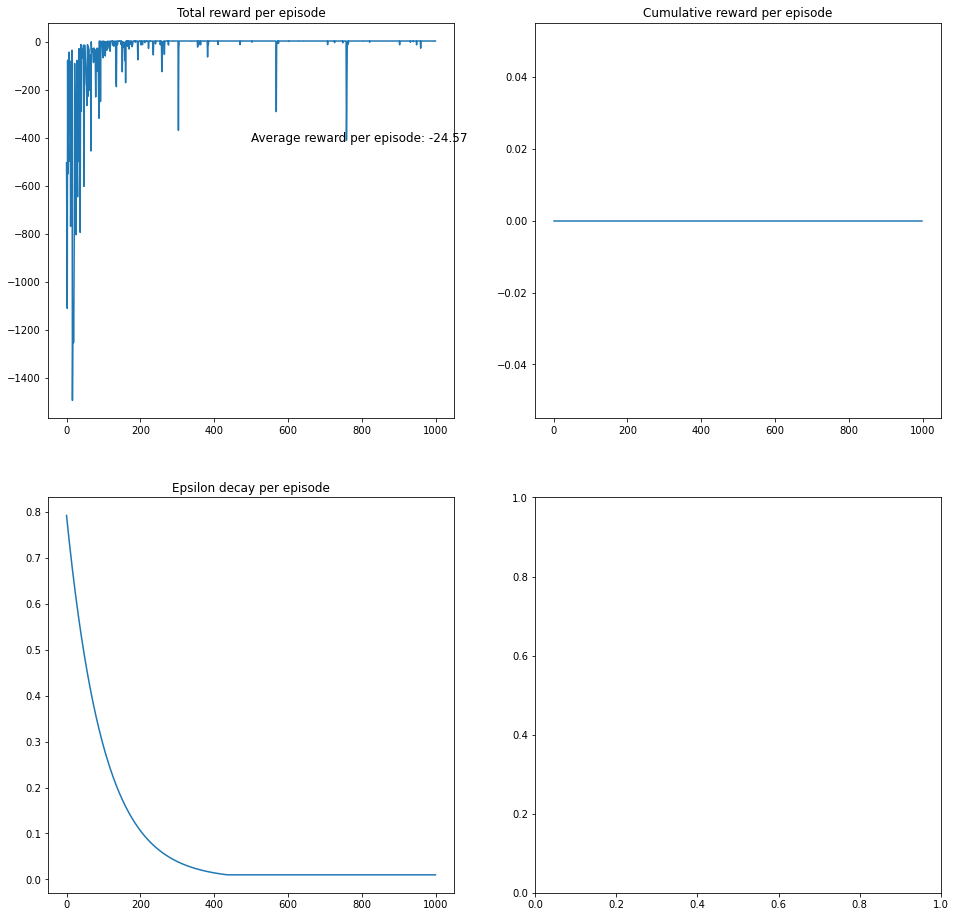

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

Text(0.5, 1.0, 'Cumulative reward per episode')

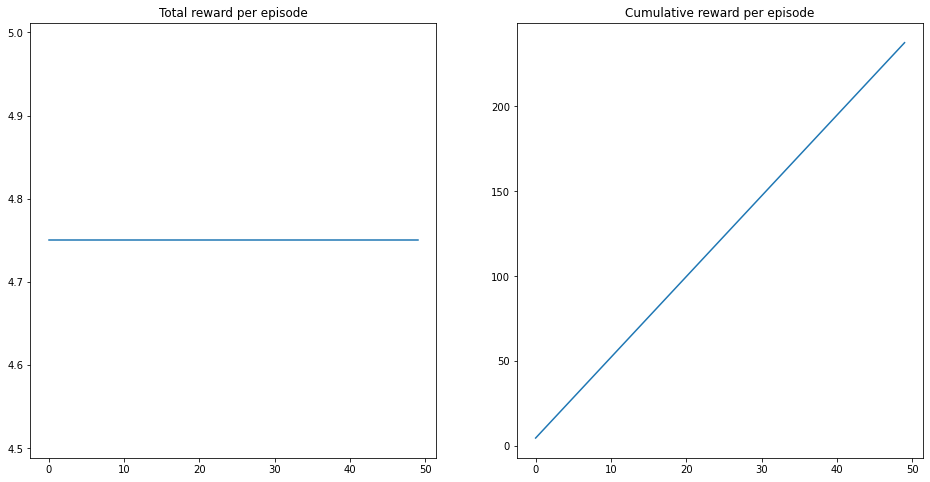

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')